# League of Legends Match Data Analysis

First things first, hide the API key.

In [1]:
from tkinter import *
from tkinter import filedialog
from tkinter import Tk
import json

In [2]:
root = Tk()
root.withdraw()

''

In [3]:
filepath = "C:/Users/Business/Documents/league_api_key.txt"
file = open(filepath, 'r')

In [4]:
credentials = json.load(file)
file.close()

In [5]:
api_key = credentials['api_key']

---

### Acquiring account info puuid

The puuids are unique ID's for each player and are required for other requests such as requesting a list of matches the player has played.

In [6]:
import requests

In [7]:
# The function to get the puuid of a player using their summoner name.
def get_puuid(summoner_name, api_key):
    api_url = f"https://euw1.api.riotgames.com/lol/summoner/v4/summoners/by-name/{summoner_name}?api_key={api_key}"
#     print(api_url)
    resp = requests.get(api_url)
    player_info = resp.json()
    print(player_info['puuid'])
    return player_info['puuid']  

In [8]:
my_summoner_name = "Bardy Bunch"

In [9]:
bardy_puuid = get_puuid(my_summoner_name, api_key)

gX8ILEi-VOfK74RYZzB4ywaz8Dl2iJOiZPr-qqIhOLEMA3Uq6WFFqSJ1SWa5DJ2YgWxB3VQckslRnA


---

### Acquiring my friends account infos

I pulled the puuid's of my friends from match data below.

In [10]:
big_sweet_guy_puuid = 'sPfM-OuP9TH0Yu0eLXxfEpdfgXsoPs3KfQfkufIVHenCCZUgdYrNWfOizpFoAGGPL3TyRXw159k_Ig'
soaking_wet_carpet_puuid = 'OE0aC5PGpk9vT4bUhhaxMUBEC_r7rknZVS2lVY89eGPQ9pdYUWdZgbkiCb_0apPLM9WYictnDqxNMw'

---

### Requesting a list of my 5v5 flex game match ID's

In [11]:
# The function to get a list of the last 100 Ranked flex match IDs of a given a player using their puuid and API key.
def get_match_ids(puuid, api_key):
    api_url = f"https://europe.api.riotgames.com/lol/match/v5/matches/by-puuid/{puuid}/ids?queue=440&start=0&count=100&api_key={api_key}"
    
#     print(api_url)
    
    resp = requests.get(api_url)
    match_ids = resp.json()
    return match_ids 

In [12]:
match_ids = get_match_ids(bardy_puuid, api_key)

# Match IDs start from the most recent games
match_ids[:5]

['EUW1_6848359042',
 'EUW1_6848289409',
 'EUW1_6848213962',
 'EUW1_6848140293',
 'EUW1_6848082964']

---

### Extracting data from a match ID

In [13]:
# A function that requests the data for a given match ID
def get_match_data(match_id, api_key):
    api_url = f"https://europe.api.riotgames.com/lol/match/v5/matches/{match_id}?api_key={api_key}"
    
#     print(api_url)
    
    resp = requests.get(api_url)
    match_data = resp.json()
    return match_data  

In [14]:
match_id = match_ids[0]
match_id

'EUW1_6848359042'

In [15]:
match_data = get_match_data(match_id, api_key)
match_data

{'metadata': {'dataVersion': '2',
  'matchId': 'EUW1_6848359042',
  'participants': ['wljEgQTo9x7KMqNlSWgmWm12GkcldkXTMO0AXM3g_UYVSm70Nd8twD4VgWgXWT-1Qk14O4BVqvAJCA',
   'AdgV4J0YvLlxLXgfPSOBesBZyZySkxERWkHboIya_JalkcLzGcAWI5VpUaTz_HvaKXe8sefRu6Rgiw',
   'z7BpLX6FI5VwJwvd7LLE2imddgzJsMEqZqPHw5o92AYMxnK8f7YIHezPW_ECChMwOUNuMyvfFD7mog',
   '9SCABG25dFpY9Ryj84L1i_9vxt-Jykqe-_el6tTzDNUgCerFW52ejPrgajHlghDeVJ4Pp90BpW-SMg',
   'z4LLiOjxuVEmlAfnkiLXUsPwK86KqumqwG3utrOHsoQtRhtpazwjciW-lFqWvkVyHu1p5jDkjy9VuQ',
   'JdbpJk4roi8cGbI6Y5hqXh6UTypz8L5dNFm0De7oWoW41g8wVDvjDLwASIl76WPrqvnJwakHWtyoDQ',
   'OE0aC5PGpk9vT4bUhhaxMUBEC_r7rknZVS2lVY89eGPQ9pdYUWdZgbkiCb_0apPLM9WYictnDqxNMw',
   'biulA_cE3DXI6VG2LyrkwzmjgzOT3gHfhBKdGGVKr6r_2syUh6t1xks-45TTlGbin5kebh-LDMgdmQ',
   'gX8ILEi-VOfK74RYZzB4ywaz8Dl2iJOiZPr-qqIhOLEMA3Uq6WFFqSJ1SWa5DJ2YgWxB3VQckslRnA',
   'sPfM-OuP9TH0Yu0eLXxfEpdfgXsoPs3KfQfkufIVHenCCZUgdYrNWfOizpFoAGGPL3TyRXw159k_Ig']},
 'info': {'endOfGameResult': 'GameComplete',
  'gameCreation': 170

In [16]:
# The order that a player appears in the metadata's participants list is the same order they will appear in the games info
# Therefore by finding our index in the meta data we can use that to find our data for the match in the info
def find_player_data(match_data, puuid):
    participants = match_data['metadata']['participants']
    player_index = participants.index(puuid)
    player_data = match_data['info']['participants'][player_index]
    return player_data

bardy_player_data = find_player_data(match_data, bardy_puuid)
bardy_player_data

{'allInPings': 0,
 'assistMePings': 1,
 'assists': 3,
 'baronKills': 0,
 'basicPings': 0,
 'bountyLevel': 0,
 'challenges': {'12AssistStreakCount': 0,
  'abilityUses': 79,
  'acesBefore15Minutes': 0,
  'alliedJungleMonsterKills': 0,
  'baronTakedowns': 0,
  'blastConeOppositeOpponentCount': 0,
  'bountyGold': 525,
  'buffsStolen': 0,
  'completeSupportQuestInTime': 0,
  'controlWardsPlaced': 0,
  'damagePerMinute': 494.14731188287465,
  'damageTakenOnTeamPercentage': 0.14978035205458304,
  'dancedWithRiftHerald': 0,
  'deathsByEnemyChamps': 7,
  'dodgeSkillShotsSmallWindow': 0,
  'doubleAces': 0,
  'dragonTakedowns': 0,
  'earlyLaningPhaseGoldExpAdvantage': 0,
  'effectiveHealAndShielding': 0,
  'elderDragonKillsWithOpposingSoul': 0,
  'elderDragonMultikills': 0,
  'enemyChampionImmobilizations': 0,
  'enemyJungleMonsterKills': 0,
  'epicMonsterKillsNearEnemyJungler': 0,
  'epicMonsterKillsWithin30SecondsOfSpawn': 0,
  'epicMonsterSteals': 0,
  'epicMonsterStolenWithoutSmite': 0,
  'fi

In [17]:
# Champion Played
champion_played = bardy_player_data['championName']
champion_played

'Kaisa'

In [18]:
# Kills
kills = bardy_player_data['kills']
kills

4

In [19]:
# Deaths
deaths = bardy_player_data['deaths']
deaths

7

In [20]:
# Assists
assists = bardy_player_data['assists']
assists

3

In [21]:
# KDA
kda = (kills + assists) / deaths
kda

1.0

---

### Collecting the data of the last 100 games we played

In [22]:
# Creates a dataframe of the last 100 matches for a player

import pandas as pd

def gather_all_data(puuid, match_ids, api_key):
    data = {
            'champion': [],
            'position': [],
            'kills': [],
            'deaths': [],
            'assists': [],
            'kda': [],
            'time dead (s)': [],
            'win': []
        }
    
    print()
    print("gathering data...")
    print()
    
    for match_id in match_ids:
#         print(match_id)

        # run the two functions to get the player data from the match ID
        match_data = get_match_data(match_id, api_key)
        player_data = find_player_data(match_data, puuid)

        # assign the variables we're interested in
        champion = player_data['championName']
        position = player_data['teamPosition']
        k = player_data['kills']
        d = player_data['deaths']
        a = player_data['assists']
        kda = player_data['challenges']['kda']
        time_dead = player_data['totalTimeSpentDead']
        win = player_data['win']

        # add them to our dataset
        data['champion'].append(champion)
        data['position'].append(position)
        data['kills'].append(k)
        data['deaths'].append(d)
        data['assists'].append(a)
        data['kda'].append(kda)
        data['time dead (s)'].append(time_dead)
        data['win'].append(win)    
    
    df = pd.DataFrame(data)
    df['win'] = df['win'].astype(int)
    
    return df

In [24]:
# Use time.sleep() to avoid request limit
import time
time.sleep(120)
bardy_df = gather_all_data(bardy_puuid, match_ids, api_key)
time.sleep(120)
big_sweet_df = gather_all_data(big_sweet_guy_puuid, match_ids, api_key)
time.sleep(120)
soaking_wet_df = gather_all_data(soaking_wet_carpet_puuid, match_ids, api_key)


gathering data...


gathering data...


gathering data...



In [25]:
bardy_df

,champion,position,kills,deaths,assists,kda,time dead (s),win
0,Kaisa,BOTTOM,4,7,3,1.000000,82,0
1,Caitlyn,BOTTOM,22,11,2,2.181818,363,0
2,Xayah,BOTTOM,11,10,3,1.400000,287,0
3,Xayah,BOTTOM,6,6,8,2.333333,163,1
4,Tryndamere,TOP,8,11,1,0.818182,322,0
...,...,...,...,...,...,...,...,...
95,Renekton,TOP,6,3,2,2.666667,57,1
96,Thresh,UTILITY,3,3,19,7.333333,99,1
97,Bard,UTILITY,4,7,15,2.714286,223,0
98,Alistar,UTILITY,5,2,22,13.500000,41,1


In [26]:
big_sweet_df

,champion,position,kills,deaths,assists,kda,time dead (s),win
0,Swain,UTILITY,2,7,6,1.142857,97,0
1,Maokai,UTILITY,2,11,20,2.000000,286,0
2,Rakan,UTILITY,0,6,14,2.333333,162,0
3,Rakan,UTILITY,0,3,16,5.333333,64,1
4,Shen,UTILITY,6,1,8,14.000000,37,0
...,...,...,...,...,...,...,...,...
95,Caitlyn,MIDDLE,3,2,4,3.500000,58,1
96,Camille,TOP,2,7,3,0.714286,175,1
97,Camille,TOP,8,8,5,1.625000,340,0
98,Camille,TOP,12,4,6,4.500000,128,1


In [27]:
soaking_wet_df

,champion,position,kills,deaths,assists,kda,time dead (s),win
0,Sejuani,JUNGLE,3,1,2,5.000000,16,0
1,Rammus,JUNGLE,2,10,10,1.200000,299,0
2,Ornn,JUNGLE,4,6,14,3.000000,166,0
3,Poppy,JUNGLE,4,4,7,2.750000,80,1
4,Ivern,JUNGLE,1,6,12,2.166667,154,0
...,...,...,...,...,...,...,...,...
95,Ivern,JUNGLE,2,2,5,3.500000,44,1
96,Ivern,JUNGLE,1,3,16,5.666667,68,1
97,Ivern,JUNGLE,4,2,11,7.500000,43,0
98,Ivern,JUNGLE,2,0,16,18.000000,0,1


---

### Now for some data visualisation

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

The below strip plots show the kill to death ratios vs our positions and whether we won or lost the game.

Bardy's strip plot suggests he only does well when he wins the game and might possibly be the reason they lose because once he falls behind he doesn't recover.

<Axes: xlabel='position', ylabel='kda'>

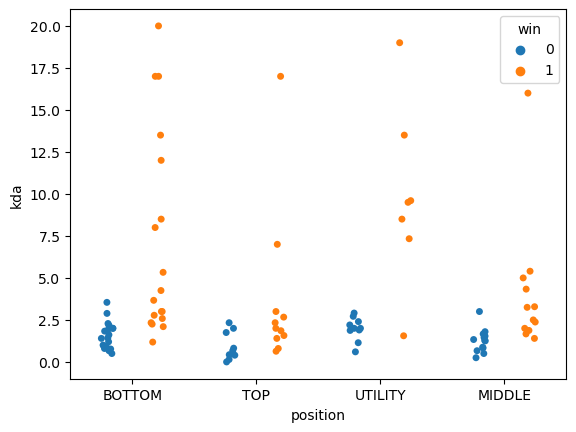

In [36]:
sns.stripplot(x="position", y="kda", data=bardy_df, hue="win", dodge=True)

Big Sweet Guy's strip plot shows he can still do well individually even when in a losing game.

<Axes: xlabel='position', ylabel='kda'>

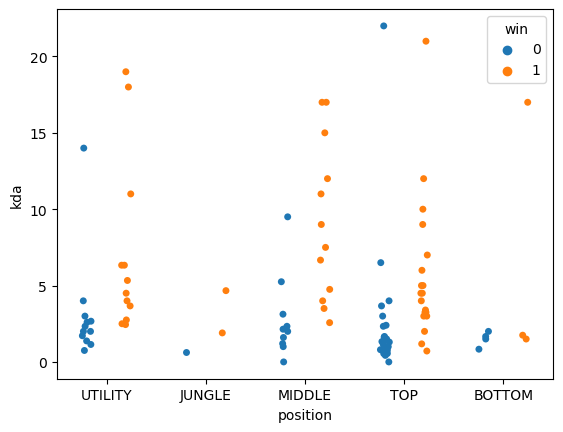

In [37]:
sns.stripplot(x="position", y="kda", data=big_sweet_df, hue="win", dodge=True)

This strip plot shows that SoakingWetCarpet can also do well in losing games and that they only like playing one position.

<Axes: xlabel='position', ylabel='kda'>

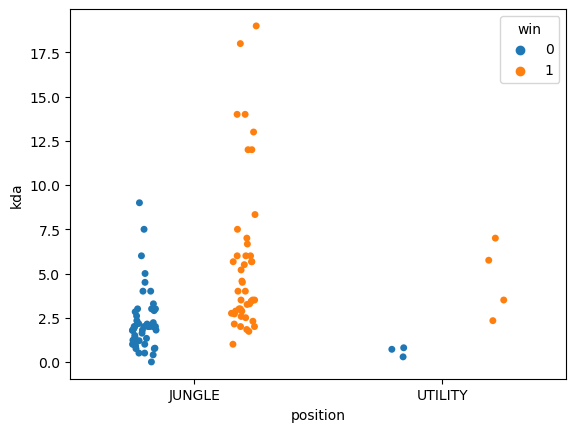

In [38]:
sns.stripplot(x="position", y="kda", data=soaking_wet_df, hue="win", dodge=True)

<Axes: xlabel='kills', ylabel='Count'>

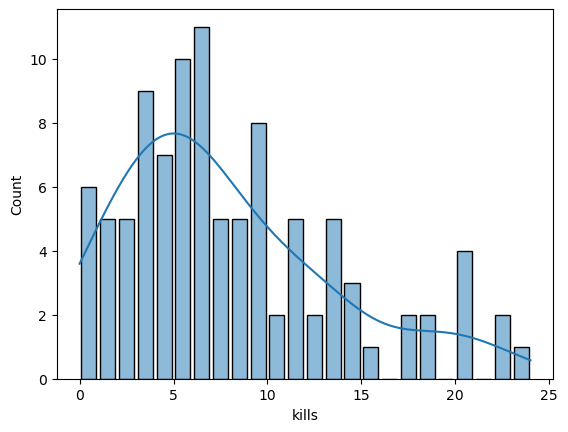

In [48]:
sns.histplot(bardy_df['kills'], kde=True, bins=24, shrink=0.8)

The below bar plot shows Bardy's average kda on champions he's played more than 3 times in the last 100 games.

<Axes: xlabel='kda', ylabel='champion'>

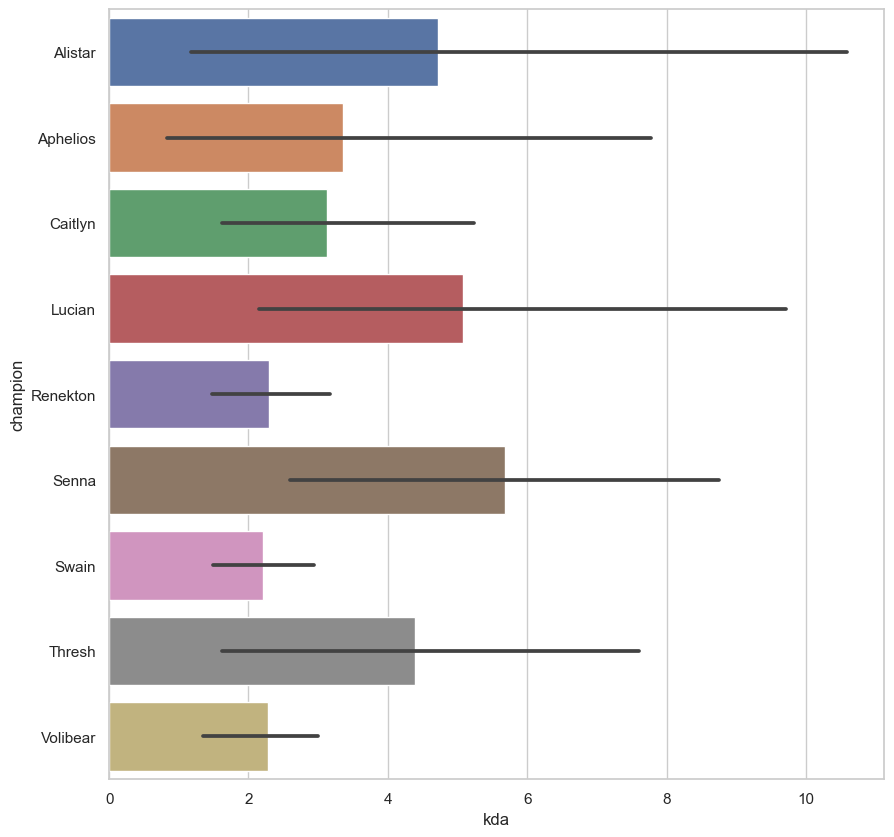

In [77]:
is_multi = bardy_df["champion"].value_counts() > 3
filtered = bardy_df[bardy_df["champion"].isin(is_multi[is_multi].index)]
bardy_champions = filtered.sort_values('champion', ascending=True)
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x='kda', y='champion', data=bardy_champions, orient='h', dodge=False)